In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def mandelbrot(h, w, max_iter, z0):
    y, x = np.ogrid[-1.5:1.5:h*1j, -2:1:w*1j]
    c = x + y*1j
    z = np.full(c.shape, z0, dtype=complex)
    div_time = np.zeros(z.shape, dtype=int)
    m = np.full(c.shape, True, dtype=bool)  # Маска точек, которые ещё не расходятся

    for i in range(max_iter):
        z[m] = z[m]**2 + c[m]
        m[np.abs(z) > 2] = False
        div_time[m] = i

    return div_time

In [3]:
def mandelbrot_log(h, w, max_iter, z0):
    return np.log(mandelbrot(h, w, max_iter, z0) + 1)

In [4]:
# SETTINGS
h = 600
w = 600
max_iter = 200
num_frames = 100

In [5]:
# z0 circle
angles = np.linspace(0, 2*np.pi, num_frames)
r = 0.8 
z0_values = r * np.exp(1j * angles)

Text(0.5, 1.0, 'z₀ = 0.80 + 0.00i')

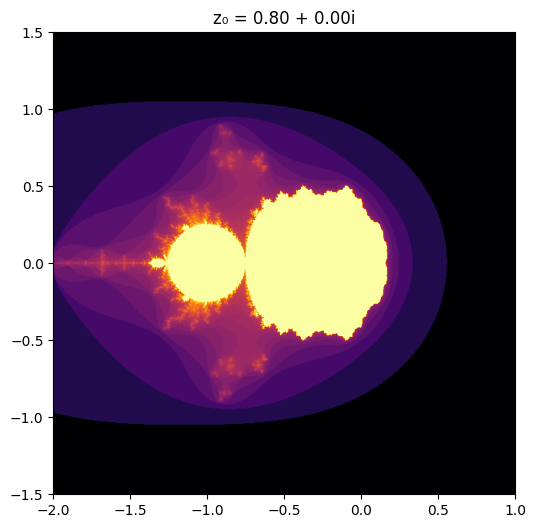

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))

im = ax.imshow(mandelbrot_log(h, w, max_iter, z0=z0_values[0]), cmap='inferno', extent=(-2, 1, -1.5, 1.5))
ax.set_title(f'z₀ = {z0_values[0].real:.2f} + {z0_values[0].imag:.2f}i')

In [7]:
def update(frame):
    z0 = z0_values[frame]
    im.set_data(mandelbrot_log(h, w, max_iter, z0))
    ax.set_title(f'z₀ = {z0.real:.2f} + {z0.imag:.2f}i')
    return [im]

In [8]:
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

In [9]:
plt.show()

In [10]:
ani.save('mandelbrot_animation.gif', fps=15)